# Import Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# Import the Data

In [5]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# Analyze the Data

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.duplicated('CustomerId').sum()

0

In [9]:
df=df.set_index('CustomerId')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding 

In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [15]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [16]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [17]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [18]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [19]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [20]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<AxesSubplot:>

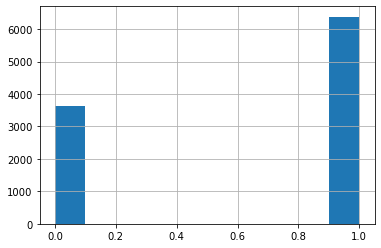

In [21]:
df['Zero Balance'].hist()

In [22]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Label and Feature

In [23]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [24]:
x=df.drop(['Surname','Churn'],axis=1)

In [25]:
y=df['Churn']

In [26]:
x.shape,y.shape

((10000, 11), (10000,))

In [27]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

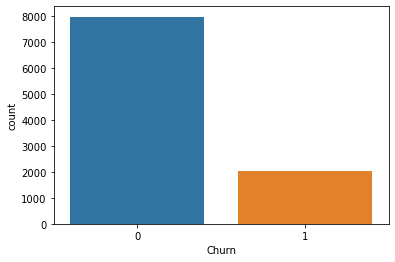

In [28]:
sns.countplot(x='Churn',data=df)

In [29]:
x.shape,y.shape

((10000, 11), (10000,))

# Random Under Sampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus=RandomUnderSampler(random_state=2529)

In [32]:
x_rus,y_rus=rus.fit_resample(x,y)

In [33]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [34]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [35]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

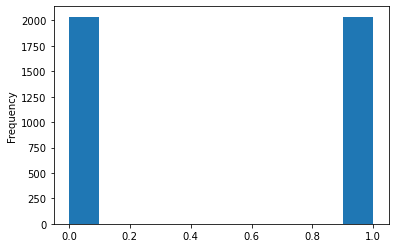

In [36]:
y_rus.plot(kind='hist')

# Random Over Sampling 

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros=RandomOverSampler(random_state=2529)

In [39]:
x_ros,y_ros=ros.fit_resample(x,y)

In [40]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [41]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [42]:
y_ros.value_counts()

0    7963
1    7963
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

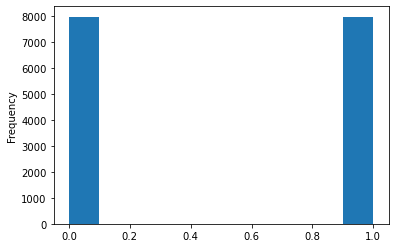

In [43]:
y_ros.plot(kind='hist')

# Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

# Split Original Data

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=192529)

# Split Random Under Sampler Data

In [46]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus,y_rus,test_size=0.3,random_state=192529)

# Split Random Over Sampler Data

In [47]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=192529)

# Standardize Features

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()

# Standardize Original Data

In [50]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [51]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Standardize Random Under Sampler Data

In [52]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [53]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Standardize Random Over Sampler Data

In [54]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [55]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Support Vector Machine Classifier

In [56]:
from sklearn.svm import SVC

In [57]:
svc=SVC()

In [58]:
svc.fit(x_train,y_train)

SVC()

In [59]:
y_pred=svc.predict(x_test)

# Model Accuracy 

In [60]:
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
confusion_matrix(y_test,y_pred)

array([[2379,   44],
       [ 424,  153]], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2423
           1       0.78      0.27      0.40       577

    accuracy                           0.84      3000
   macro avg       0.81      0.62      0.65      3000
weighted avg       0.83      0.84      0.81      3000



# Hyperparameter Tunning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid={'C':[0.1,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
           'class_weight':['balanced']}

In [65]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [66]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [67]:
grid_predictions=grid.predict(x_test)

In [68]:
confusion_matrix(y_test,grid_predictions)

array([[2187,  236],
       [ 369,  208]], dtype=int64)

In [69]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2423
           1       0.47      0.36      0.41       577

    accuracy                           0.80      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.80      0.79      3000



# Model with Random Under  Sampling 

In [70]:
svc_rus=SVC()

In [71]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [72]:
y_pred_rus=svc_rus.predict(x_test_rus)

# Model Accuracy

In [73]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[479, 150],
       [166, 428]], dtype=int64)

In [74]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       629
           1       0.74      0.72      0.73       594

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# Hyperparameter Tunning 

In [75]:
param_grid={'C':[0.1,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
           'class_weight':['balanced']}

In [76]:
grid_rus=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [77]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [78]:
grid_predictions_rus=grid_rus.predict(x_test_rus)

In [79]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[477, 152],
       [171, 423]], dtype=int64)

In [80]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       629
           1       0.74      0.71      0.72       594

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# Model with Random Over Sampling

In [81]:
svc_ros=SVC()

In [82]:
svc_ros.fit(x_train_ros,y_train_ros)

SVC()

In [83]:
y_pred_ros=svc_ros.predict(x_test_ros)

# Model Accuracy

In [84]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1813,  548],
       [ 603, 1814]], dtype=int64)

In [85]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2361
           1       0.77      0.75      0.76      2417

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



# Hyperparameter Tunning

In [86]:
param_grid={'C':[0.1,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
           'class_weight':['balanced']}

In [87]:
grid_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [88]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [89]:
grid_predictions_ros=grid_ros.predict(x_test_ros)

In [90]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2012,  349],
       [  68, 2349]], dtype=int64)

In [91]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2361
           1       0.87      0.97      0.92      2417

    accuracy                           0.91      4778
   macro avg       0.92      0.91      0.91      4778
weighted avg       0.92      0.91      0.91      4778



# Lets Compare

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2423
           1       0.78      0.27      0.40       577

    accuracy                           0.84      3000
   macro avg       0.81      0.62      0.65      3000
weighted avg       0.83      0.84      0.81      3000



In [93]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2423
           1       0.47      0.36      0.41       577

    accuracy                           0.80      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.80      0.79      3000



In [94]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       629
           1       0.74      0.72      0.73       594

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [95]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       629
           1       0.74      0.71      0.72       594

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [96]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2361
           1       0.77      0.75      0.76      2417

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



In [97]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2361
           1       0.87      0.97      0.92      2417

    accuracy                           0.91      4778
   macro avg       0.92      0.91      0.91      4778
weighted avg       0.92      0.91      0.91      4778

